# This notebook is the beginning of my TELCO PROJECT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import acquire
import prepare
from scipy import stats

# NOTES AND TAKEAWAYS

## Univariate notes
    # Not many senior citizens
    # tenure is like an inverse normal curve. Skewed toward the low and high ends. Those low end values are dragging the avg down a litle
    # a lot of low total charges are dragging down the avg. not normal-->mann whitney test later?
    # none of these features seems very 'normally' distributed, expect to do some hypothesis testing
    # many more "no churn" accounts, so this will be our baseline
    
    #probably some chi2 testing on different categoricals in bivariate analysis. churn/payment type for ex
    #mann whitney for some of those continuos values (monthly and total charges, really)

In [2]:
raw_telco_df = acquire.get_telco_data()
raw_telco_df.sample(50)

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
6605                2                         3                 1  1641-BYBTK   
4963                1                         2                 1  7274-RTAPZ   
2056                1                         1                 1  6959-UWKHF   
2017                1                         1                 1  6633-MPWBS   
222                 3                         1                 3  3884-UEBXB   
1411                3                         1                 1  1848-LBZHY   
6814                2                         3                 1  5372-FBKBN   
1848                2                         1                 1  5207-PLSTK   
3905                1                         2                 1  2506-TNFCO   
5505                2                         2                 1  9943-VSZUV   
4902                2                         2                 1  6986-IJDHX   
4492                1                         2                 1  5108-ADXWO   
6081                4                         3                 3  8780-IHCRN   
3952                4                         2                 1  2694-CIUMO   
3604                4                         2                 1  0979-PHULV   
5931                2                         3                 3  6518-PPLMZ   
2074                1                         1                 1  7129-ACFOG   
5873                2                         3                 3  5549-ZGHFB   
2448                4                         2                 3  0675-NCDYU   
2134                1                         1                 1  7634-WSWDB   
6030                2                         3                 3  8043-PNYSD   
1470                1                         1                 1  2346-DJQTB   
1468                4                         1                 1  2320-SLKMB   
280                 3                         1                 3  4872-JCVCA   
887                 4                         1                 2  4626-OZDTJ   
3814                3                         2                 1  2074-GKOWZ   
5065                3                         2                 1  7776-QGYJC   
2927                1                         2                 2  1357-BIJKI   
1794                2                         1                 1  4827-USJHP   
3715                2                         2                 1  1583-IHQZE   
918                 2                         1                 2  5081-NWSUP   
3586                1                         2                 1  0921-OHLVP   
6584                2                         3                 1  1257-SXUXQ   
410                 4                         1                 3  6656-GULJQ   
65                  4                         1                 3  0973-KYVNF   
173                 3                         1                 3  3071-MVJCD   
1398                2                         1                 1  1763-WQFUK   
5583                2                         3                 3  1089-XZWHH   
6695                2                         3                 1  3148-BLQJT   
1225                1                         1                 1  0289-IVARM   
4123                1                         2                 1  3398-ZOUAA   
3231                3                         2                 2  6849-OYAMU   
5438                1                         2                 1  9681-KYGYB   
1925                1                         1                 1  5909-ECHUI   
4137                3                         2                 1  3452-SRFEG   
1918                2                         1                 1  5832-EXGTT   
4673                1                         2                 1  5914-DVBWJ   
2318                1                         1                 1  9048-JVYVF   
2444                1                

In [3]:
raw_telco_df.shape

(7043, 24)

In [4]:
raw_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
raw_telco_df.describe()

payment_type_id  internet_service_type_id  contract_type_id  \
count      7043.000000               7043.000000       7043.000000   
mean          2.315633                  1.872923          1.690473   
std           1.148907                  0.737796          0.833755   
min           1.000000                  1.000000          1.000000   
25%           1.000000                  1.000000          1.000000   
50%           2.000000                  2.000000          1.000000   
75%           3.000000                  2.000000          2.000000   
max           4.000000                  3.000000          3.000000   

       senior_citizen       tenure  monthly_charges  
count     7043.000000  7043.000000      7043.000000  
mean         0.162147    32.371149        64.761692  
std          0.368612    24.559481        30.090047  
min          0.000000     0.000000        18.250000  
25%          0.000000     9.000000        35.500000  
50%          0.000000    29.000000        70.350000  
75%          0.000000    55.000000        89.850000  
max          1.000000    72.000000       118.750000

# I utilized my prep_telco and split_telco_data functions from prepare.py to get the data ready

### Remember how we call functions from file please

In [6]:
# take note of how we had to call the prepare.py file here
telco_prepped = prepare.prep_telco(raw_telco_df)

In [7]:
telco_prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   customer_id                             7043 non-null   object  
 1   gender                                  7043 non-null   object  
 2   senior_citizen                          7043 non-null   int64   
 3   partner                                 7043 non-null   object  
 4   dependents                              7043 non-null   object  
 5   tenure                                  7043 non-null   int64   
 6   phone_service                           7043 non-null   object  
 7   multiple_lines                          7043 non-null   object  
 8   online_security                         7043 non-null   object  
 9   online_backup                           7043 non-null   object  
 10  device_protection                       7043 non

In [8]:
#here, we reassign the three values returned from the split_data function to new variables
telco_train, telco_validate, telco_test = prepare.split_telco_data(telco_prepped)
print(f'telco_train: {telco_train.shape}')
print(f'telco_validate: {telco_validate.shape}')
print(f'telco_test: {telco_test.shape}')

telco_train: (3943, 61)
telco_validate: (1691, 61)
telco_test: (1409, 61)


In [9]:
# telco_train.isnull().sum()
# #great, no null values

In [10]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

telco_X_train = telco_train.drop(columns=['churn_Yes'])
telco_y_train = telco_train.churn_Yes

telco_X_validate = telco_validate.drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.churn_Yes

telco_X_test = telco_test.drop(columns=['churn_Yes'])
telco_y_test = telco_test.churn_Yes

In [11]:
print(f'telco_X_train: {telco_X_train.shape}')
print(f'telco_y_train: {telco_y_train.shape}')


print(f'telco_X_validate: {telco_X_validate.shape}')
print(f'telco_y_validate: {telco_y_validate.shape}')


print(f'telco_X_test: {telco_X_test.shape}')
print(f'telco_y_test: {telco_y_test.shape}')

telco_X_train: (3943, 60)
telco_y_train: (3943,)
telco_X_validate: (1691, 60)
telco_y_validate: (1691,)
telco_X_test: (1409, 60)
telco_y_test: (1409,)


# At this point, we now have our train, validate, test data sets

In [12]:
telco_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4349 to 913
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   customer_id                             3943 non-null   object  
 1   gender                                  3943 non-null   object  
 2   senior_citizen                          3943 non-null   int64   
 3   partner                                 3943 non-null   object  
 4   dependents                              3943 non-null   object  
 5   tenure                                  3943 non-null   int64   
 6   phone_service                           3943 non-null   object  
 7   multiple_lines                          3943 non-null   object  
 8   online_security                         3943 non-null   object  
 9   online_backup                           3943 non-null   object  
 10  device_protection                       3943 n

In [13]:
telco_X_train.describe().T

count         mean          std  \
senior_citizen                          3943.0     0.156987     0.363835   
tenure                                  3943.0    32.519148    24.679078   
monthly_charges                         3943.0    64.972584    30.185092   
total_charges                           3943.0  2304.820048  2298.301908   
gender_Male                             3943.0     0.502409     0.500058   
partner_Yes                             3943.0     0.491758     0.499995   
dependents_Yes                          3943.0     0.303576     0.459860   
phone_service_Yes                       3943.0     0.904641     0.293747   
multiple_lines_No phone service         3943.0     0.095359     0.293747   
multiple_lines_Yes                      3943.0     0.417956     0.493285   
online_security_No internet service     3943.0     0.217094     0.412319   
online_security_Yes                     3943.0     0.295207     0.456193   
online_backup_No internet service       3943.0     0.217094     0.412319   
online_backup_Yes                       3943.0     0.346944     0.476058   
device_protection_No internet service   3943.0     0.217094     0.412319   
device_protection_Yes                   3943.0     0.357849     0.479428   
tech_support_No internet service        3943.0     0.217094     0.412319   
tech_support_Yes                        3943.0     0.293939     0.455622   
streaming_tv_No internet service        3943.0     0.217094     0.412319   
streaming_tv_Yes                        3943.0     0.388537     0.487479   
streaming_movies_No internet service    3943.0     0.217094     0.412319   
streaming_movies_Yes                    3943.0     0.389805     0.487768   
paperless_billing_Yes                   3943.0     0.590160     0.491866   
contract_type_One year                  3943.0     0.207456     0.405537   
contract_type_Two year                  3943.0     0.248795     0.432370   
internet_service_type_Fiber optic       3943.0     0.439767     0.496422   
internet_service_type_None              3943.0     0.217094     0.412319   
payment_type_Credit card (automatic)    3943.0     0.215572     0.411271   
payment_type_Electronic check           3943.0     0.338321     0.473198   
payment_type_Mailed check               3943.0     0.227745     0.419431   
monthly_charges_bins_(25.05, 58.83]     3943.0     0.193254     0.394900   
monthly_charges_bins_(58.83, 79.1]      3943.0     0.201877     0.401452   
monthly_charges_bins_(79.1, 94.25]      3943.0     0.200609     0.400507   
monthly_charges_bins_(94.25, 118.75]    3943.0     0.202130     0.401640   
total_charges_bins_(116.112, 398.55]    3943.0     0.127314     0.333367   
total_charges_bins_(398.55, 838.362]    3943.0     0.123256     0.328773   
total_charges_bins_(838.362, 1394.55]   3943.0     0.121988     0.327314   
total_charges_bins_(1394.55, 2290.225]  3943.0     0.120720     0.325843   
total_charges_bins_(2290.225, 3786.6]   3943.0     0.125032     0.330797   
total_charges_bins_(3786.6, 5606.375]   3943.0     0.122749     0.328191   
total_charges_bins_(5606.375, 8684.8]   3943.0     0.131626     0.338126   

                                          min     25%     50%     75%      max  
senior_citizen                           0.00    0.00     0.0     0.0     1.00  
tenure                                   0.00    9.00    29.0    56.0    72.00  
monthly_charges                         18.25   35.75    70.6    90.1   118.75  
total_charges                            0.00  385.45  1396.0  3864.0  8684.80  
gender_Male                              0.00    0.00     1.0     1.0     1.00  
partner_Yes                              0.00    0.00     0.0     1.0     1.00  
dependents_Yes                           0.00    0.00     0.0     1.0     1.00  
phone_service_Yes                        0.00    1.00     1.0     1.0     1.00  
multiple_lines_No phone service          0.00    0.00     0.0     0.0     1.00  
multiple_lines_Yes                    

# Univariate analysis:

In [14]:
telco_X_train.head().T

4349  \
customer_id                                     4484-GLZOU   
gender                                              Female   
senior_citizen                                           0   
partner                                                Yes   
dependents                                              No   
tenure                                                  52   
phone_service                                          Yes   
multiple_lines                                         Yes   
online_security                                         No   
online_backup                                          Yes   
device_protection                                      Yes   
tech_support                                            No   
streaming_tv                                           Yes   
streaming_movies                                       Yes   
paperless_billing                                      Yes   
monthly_charges                                     105.05   
total_charges                                      5624.85   
churn                                                  Yes   
contract_type                               Month-to-month   
internet_service_type                          Fiber optic   
payment_type                              Electronic check   
monthly_charges_bins                       (94.25, 118.75]   
total_charges_bins                      (5606.375, 8684.8]   
gender_Male                                              0   
partner_Yes                                              1   
dependents_Yes                                           0   
phone_service_Yes                                        1   
multiple_lines_No phone service                          0   
multiple_lines_Yes                                       1   
online_security_No internet service                      0   
online_security_Yes                                      0   
online_backup_No internet service                        0   
online_backup_Yes                                        1   
device_protection_No internet service                    0   
device_protection_Yes                                    1   
tech_support_No internet service                         0   
tech_support_Yes                                         0   
streaming_tv_No internet service                         0   
streaming_tv_Yes                                         1   
streaming_movies_No internet service                     0   
streaming_movies_Yes                                     1   
paperless_billing_Yes                                    1   
contract_type_One year                                   0   
contract_type_Two year                                   0   
internet_service_type_Fiber optic                        1   
internet_service_type_None                               0   
payment_type_Credit card (automatic)                     0   
payment_type_Electronic check                            1   
payment_type_Mailed check                                0   
monthly_charges_bins_(25.05, 58.83]                      0   
monthly_charges_bins_(58.83, 79.1]                       0   
monthly_charges_bins_(79.1, 94.25]                       0   
monthly_charges_bins_(94.25, 118.75]                     1   
total_charges_bins_(116.112, 398.55]                     0   
total_charges_bins_(398.55, 838.362]                     0   
total_charges_bins_(838.362, 1394.55]                    0   
total_charges_bins_(1394.55, 2290.225]                   0   
total_charges_bins_(2290.225, 3786.6]                    0   
total_charges_bins_(3786.6, 5606.375]                    0   
total_charges_bins_(5606.375, 8684.8]                    1   

                                                       6616  \
customer_id                                      1850-AKQEP   
gender                                                 Male   
senior_citizen                                            0   
partner            

In [15]:
# this cell is isolating the number format columns for analysis below

num_cols = telco_X_train.columns[[telco_X_train[col].dtype in ('int64', 'float64') for col in telco_X_train.columns]]
num_cols = list(num_cols)
to_append = ["gender_Male", "partner_Yes","dependents_Yes"]
for var in to_append:
    num_cols.append(var)

num_cols

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes']

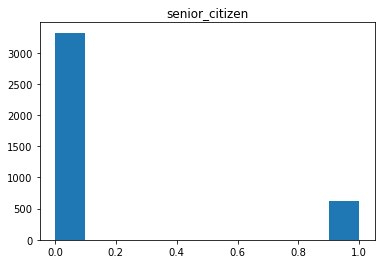

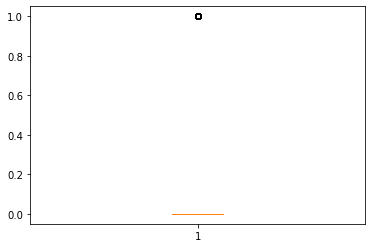

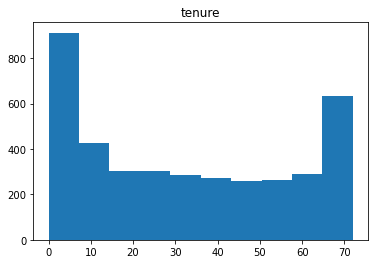

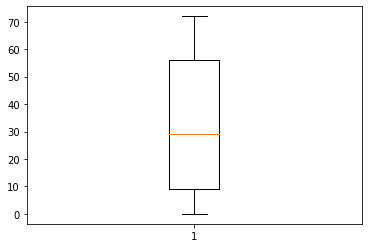

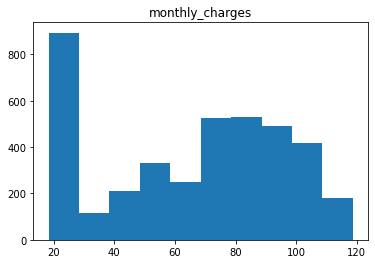

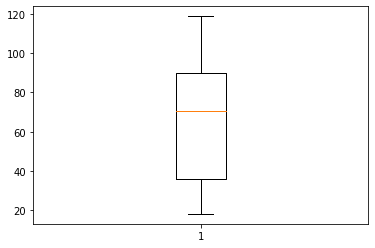

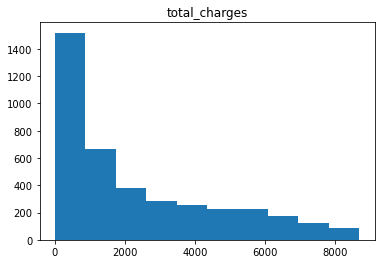

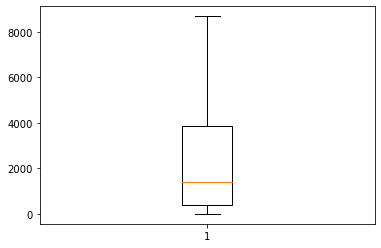

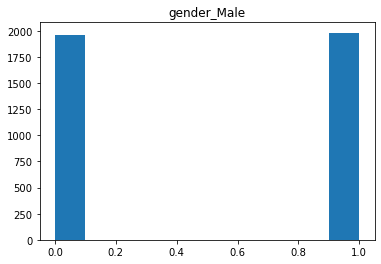

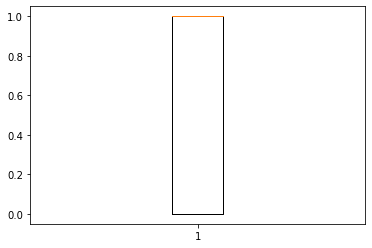

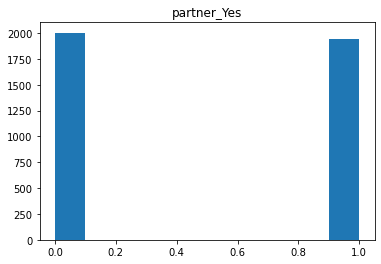

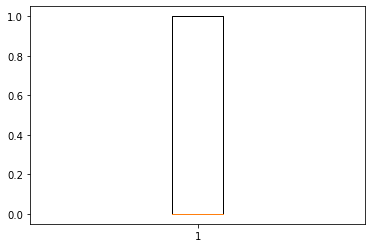

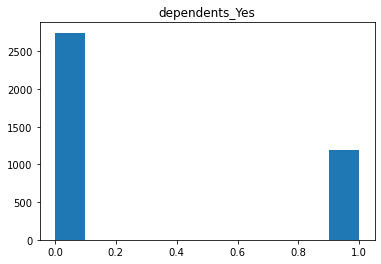

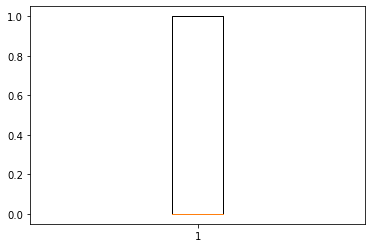

In [16]:
# getting an error now bc i split the churn_Yes feature into the y_train set. doing a separate command for that

# this cell is giving me a histogram and boxplot for all numerical data.  

for col in num_cols:
    telco_X_train[col]
    plt.hist(telco_X_train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(telco_X_train[col])
    plt.show()
#     else:
#         plt.hist(telco_y_train[col]
#         plt.title(col)
#         plt.show()
#         plt.boxplot(telco_y_train[col])
#         plt.show())
# Notes:
# Not many senior citizens
# tenur is like an inverse normals curve. Skewed toward the low and high ends. Those low end values are dragging the avg down a litle
# quite a lot of $20 monthly charges. Just basic phone service, presumably?
# a lot of low total charges, which are dragging down the avg subustantially
# none of these features seems very 'normally' distributed, expect to do some hypothesis testing
# half and half for sex and partner; slightly more peoplo with no dependents


# many more "no churn" accounts, so this will be our baseline

In [17]:
telco_y_train.value_counts()


0    2897
1    1046
Name: churn_Yes, dtype: int64

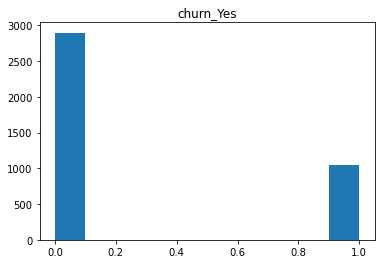

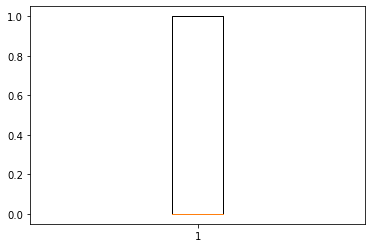

In [18]:
plt.hist(telco_y_train)
plt.title('churn_Yes')
plt.show()
plt.boxplot(telco_y_train)
plt.show()

#roughly 1/4 of the accounts are churned

# "no churn" will be our baseline

# and....nice work repeating work that you had done below. 

In [19]:
# this cell is isolating the columns with a uint8 type for analysis

# uint_cols = telco_train.columns[[telco_train[col].dtype == 'uint8' for col in telco_train.columns]]
# uint_cols

# ON ADAM'S ADVICE, NOT EXPLORING ENCODED FEATURES

In [20]:
# and here, we get an idea of what each uint8 feature contains

# for col in uint_cols:
#     print(telco_train[col].value_counts())
#     print(telco_train[col].value_counts(normalize = True, dropna=False))
#     print('------------------------')
    
# NOTES
# 51% male
# 51% NO partner
# 70% NO dependents
# 90% YES phone service

# ON ADAM'S ADVICE, I'M NOT GOING TO CONTINUE EXPLORING THE ENCODED FEATURES

In [21]:
# this cell is isolating the columns with an object ('O') type for analysis

obj_cols = telco_train.columns[[telco_train[col].dtype == 'O' for col in telco_train.columns]]
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [22]:
# and here, we get an idea of what each object feature contains

for col in obj_cols:
    print(telco_train[col].value_counts())
    print(telco_train[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
    
# 51% male
# 51% no partner
# 70% no dependents
# 90% phone service
# 48% no multiple lines + 9% no phone svc
# 49% no online security + 22% no internet svc
# 43% no internet svc
# 48% no tech support
# 39% no streaming tv
# 39% no streaming movies
# 59% paperless billing
# 73% churn
# 55% month to month contract
# 43% fiber optic
# 33% elecronic check

9294-TDIPC    1
2342-CKIAO    1
4828-FAZPK    1
2302-ANTDP    1
7112-OPOTK    1
             ..
9469-WEJBT    1
5519-NPHVG    1
2754-VDLTR    1
6332-FBZRI    1
7534-BFESC    1
Name: customer_id, Length: 3943, dtype: int64
9294-TDIPC    0.000254
2342-CKIAO    0.000254
4828-FAZPK    0.000254
2302-ANTDP    0.000254
7112-OPOTK    0.000254
                ...   
9469-WEJBT    0.000254
5519-NPHVG    0.000254
2754-VDLTR    0.000254
6332-FBZRI    0.000254
7534-BFESC    0.000254
Name: customer_id, Length: 3943, dtype: float64
------------------------
Male      1981
Female    1962
Name: gender, dtype: int64
Male      0.502409
Female    0.497591
Name: gender, dtype: float64
------------------------
No     2004
Yes    1939
Name: partner, dtype: int64
No     0.508242
Yes    0.491758
Name: partner, dtype: float64
------------------------
No     2746
Yes    1197
Name: dependents, dtype: int64
No     0.696424
Yes    0.303576
Name: dependents, dtype: float64
------------------------
Yes    3567
No     

In [23]:
telco_train.monthly_charges.value_counts(bins=5, sort=False)

# lots of monthly charges at the bottom and upper middle

(18.148999999999997, 38.35]    1008
(38.35, 58.45]                  543
(58.45, 78.55]                  774
(78.55, 98.65]                 1023
(98.65, 118.75]                 595
Name: monthly_charges, dtype: int64

In [24]:
telco_train.total_charges.value_counts(bins=5, sort=False)

#again, total charges considerably skewed

(-8.686, 1736.96]     2186
(1736.96, 3473.92]     667
(3473.92, 5210.88]     481
(5210.88, 6947.84]     400
(6947.84, 8684.8]      209
Name: total_charges, dtype: int64

## Bivariate notes



In [25]:
telco_X_train.head().T

4349  \
customer_id                                     4484-GLZOU   
gender                                              Female   
senior_citizen                                           0   
partner                                                Yes   
dependents                                              No   
tenure                                                  52   
phone_service                                          Yes   
multiple_lines                                         Yes   
online_security                                         No   
online_backup                                          Yes   
device_protection                                      Yes   
tech_support                                            No   
streaming_tv                                           Yes   
streaming_movies                                       Yes   
paperless_billing                                      Yes   
monthly_charges                                     105.05   
total_charges                                      5624.85   
churn                                                  Yes   
contract_type                               Month-to-month   
internet_service_type                          Fiber optic   
payment_type                              Electronic check   
monthly_charges_bins                       (94.25, 118.75]   
total_charges_bins                      (5606.375, 8684.8]   
gender_Male                                              0   
partner_Yes                                              1   
dependents_Yes                                           0   
phone_service_Yes                                        1   
multiple_lines_No phone service                          0   
multiple_lines_Yes                                       1   
online_security_No internet service                      0   
online_security_Yes                                      0   
online_backup_No internet service                        0   
online_backup_Yes                                        1   
device_protection_No internet service                    0   
device_protection_Yes                                    1   
tech_support_No internet service                         0   
tech_support_Yes                                         0   
streaming_tv_No internet service                         0   
streaming_tv_Yes                                         1   
streaming_movies_No internet service                     0   
streaming_movies_Yes                                     1   
paperless_billing_Yes                                    1   
contract_type_One year                                   0   
contract_type_Two year                                   0   
internet_service_type_Fiber optic                        1   
internet_service_type_None                               0   
payment_type_Credit card (automatic)                     0   
payment_type_Electronic check                            1   
payment_type_Mailed check                                0   
monthly_charges_bins_(25.05, 58.83]                      0   
monthly_charges_bins_(58.83, 79.1]                       0   
monthly_charges_bins_(79.1, 94.25]                       0   
monthly_charges_bins_(94.25, 118.75]                     1   
total_charges_bins_(116.112, 398.55]                     0   
total_charges_bins_(398.55, 838.362]                     0   
total_charges_bins_(838.362, 1394.55]                    0   
total_charges_bins_(1394.55, 2290.225]                   0   
total_charges_bins_(2290.225, 3786.6]                    0   
total_charges_bins_(3786.6, 5606.375]                    0   
total_charges_bins_(5606.375, 8684.8]                    1   

                                                       6616  \
customer_id                                      1850-AKQEP   
gender                                                 Male   
senior_citizen                                            0   
partner            

- Is there a relationship between....
        - sex and churn? no apparent relationship. DON'T PURSUE
        - senior citizen? is_senior ~ higher churn. DON'T PURUE
        - partners and churn? no partner ~ higher churn.  MAYBE PURSUE
        - dependents and churn: no dependents ~ higher churn. MAYBE PURSUE: CHI2  
        - tenure: longer tenure ~ lower churn. DO MANN WHIT (this is not normally distributed)
        - phone service: nothing here. DON'T PURSUE
        - multiple lines: minimally higher churn for multiple lines. DON'T PURSUE
        -streaming tv: minimally higher churn for none. DON'T BOTHER
        -streaming movies: same. DON'T BOTHER
        -Somewhat higher churn for those with paperless billing. PURSUE: SEEMS COUNTERINTUITIVE. DO CHI2
        -contract type: month-to-month has way higher churn.  obvious? MAYBE DON'T PURSUE
        -internet service type: fiber optic has way highest churn. DEF PURSUE. CHI2
        -payment type: electronic check has way highest churn. DEF PURSUE WITH A CHI2
        -monthly charges: Churn increases as do monthly charges, up to a point. MAYBE DON'T PURSUE
        -Churn higher where total charges are least. DEF PURSUE. USE A pearson-r ON THE CONTINUOUS COLUMN THOUGH
        

## NEXT STEP: tests.  Create your hypotheses

### dependents: chi2
    - ùêªùëú : having dependents is unrelated to churn
    - ùêªùëé : having dependents is related to churn
            - We reject the null hypothesis
        
### tenure: mann-whit
    - ùêªùëú : tenure among churn and non-churn is unrelated
    - ùêªùëé : tenure is related to churn
            - We reject the null hypothesis
        
### paperless billing: chi2
    - ùêªùëú : having paperless billing is unrelated to churn
    - ùêªùëé : having paperless billing is related to churn
            - We reject the null hypothesis
        
### internet service type: chi2
    - ùêªùëú : internet service type is unrelated to churn
    - ùêªùëé : internet service type is related to churn
            - We reject the null hypothesis
            
### payment type: chi2
    - ùêªùëú : paying by electronic check is unrelated to churn
    - ùêªùëé : paying by electronic check is related to churn
            - We reject the null hypothesis
            
### total charges: pearson-r it, but on the continuous data set
    - ùêªùëú : tenure and total charges are not linearly correlated
    - ùêªùëé : tenure and total charges are linearly correlated
        #### We reject the null hypothesis

In [26]:
# plt.title("No relationship apparent regarding sex and churn")
# sns.barplot(y=telco_y_train, x="gender", data=telco_X_train)
# plt.legend()
# plt.show()

In [27]:
# plt.title("Senior Citizen Churn Considerably More")
# sns.barplot(y=telco_y_train, x="senior_citizen", data=telco_X_train)
# plt.legend()
# plt.show()

# chi ^2 test possible

In [28]:
# plt.title("There is an apparent relationship between having a partner and churning")
# sns.barplot(y=telco_y_train, x="partner", data=telco_X_train)
# plt.legend()
# plt.show()

# this requires stat testing.  this is categorical against categorical, so chi 2.  h_o and h_a??

No handles with labels found to put in legend.


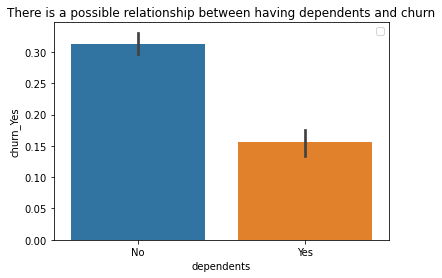

In [29]:
plt.title("There is a possible relationship between having dependents and churn")
sns.barplot(y=telco_y_train, x="dependents", data=telco_X_train)
plt.legend()
plt.show()

# also a stat test: chi^2

In [58]:
observed_dependents = pd.crosstab(telco_X_train.dependents, telco_y_train)
observed_dependents

churn_Yes      0    1
dependents           
No          1886  860
Yes         1011  186

    - ùêªùëú : having dependents is unrelated to churn
    - ùêªùëé : having dependents is related to churn

In [61]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed_dependents.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[1886  860]
 [1011  186]]
---
Expected

[[2017  728]
 [ 879  317]]
---

chi^2 = 105.6857
p     = 0.0000
We reject the null hypothesis


No handles with labels found to put in legend.


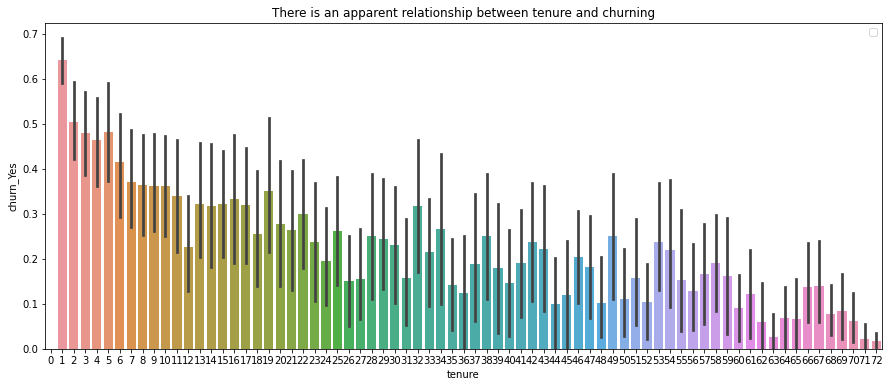

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [30]:
plt.figure(figsize=(15,6))
plt.title("There is an apparent relationship between tenure and churning")
sns.barplot(y=telco_y_train, x="tenure", data=telco_X_train)
plt.legend()
plt.show()
plt.tight_layout

# churn appears to decrease as you have longer tenure.  Continuous vs categorical--> t_test. NO, this is
# not normally distributed.  Look for a non-parametric test.  Mann-whitney

In [31]:
# telco_X_train.tenure.hist()
#just checking for distribution type

    - ùêªùëú : tenure among churn and non-churn is unrelated
    - ùêªùëé : tenure is related to churn

In [57]:
mann_whit, p_value = scipy.stats.mannwhitneyu(telco_X_train.tenure, telco_y_train, )


if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
mann_whit, p_value

We reject the null hypothesis


(197494.0, 0.0)

In [32]:
# plt.title("No relationship apparent regarding phone service and churn")
# sns.barplot(y=telco_y_train, x="phone_service", data=telco_X_train)
# plt.legend()
# plt.show()

In [33]:
# plt.title("Minimally higher churn for multiple lines")
# sns.barplot(y=telco_y_train, x="multiple_lines", data=telco_X_train)
# plt.legend()
# plt.show()

# #not pursuing

In [34]:
# plt.title("Minimally higher churn for no streaming tv")
# sns.barplot(y=telco_y_train, x="streaming_tv", data=telco_X_train)
# plt.legend()
# plt.show()

# # not pursuing

In [35]:
# plt.title("Minimally higher churn for no streaming movies")
# sns.barplot(y=telco_y_train, x="streaming_movies", data=telco_X_train)
# plt.legend()
# plt.show()

# # not pursuing

No handles with labels found to put in legend.


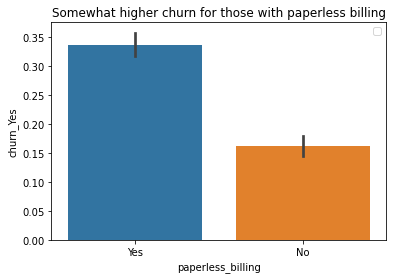

In [36]:
plt.title("Somewhat higher churn for those with paperless billing")
sns.barplot(y=telco_y_train, x="paperless_billing", data=telco_X_train)
plt.legend()
plt.show()

# stats test this with the chi-2

In [37]:
telco_X_train.paperless_billing.value_counts()

Yes    2327
No     1616
Name: paperless_billing, dtype: int64

In [60]:
observed_billing = pd.crosstab(telco_X_train.paperless_billing, telco_y_train)
observed_billing

churn_Yes             0    1
paperless_billing           
No                 1354  262
Yes                1543  784

    - ùêªùëú : having paperless billing is unrelated to churn
    - ùêªùëé : having paperless billing is related to churn

In [62]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed_billing.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[1354  262]
 [1543  784]]
---
Expected

[[2017  728]
 [ 879  317]]
---

chi^2 = 105.6857
p     = 0.0000
We reject the null hypothesis


In [38]:
# plt.title("Month-to-month has way higher churn")
# sns.barplot(y=telco_y_train, x= 'contract_type', data=telco_X_train)
# plt.legend()
# plt.show()

# # is this worth pursuing? seems rather obvious


No handles with labels found to put in legend.


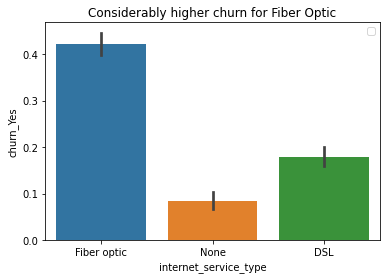

In [39]:
plt.title("Considerably higher churn for Fiber Optic")
sns.barplot(y=telco_y_train, x= 'internet_service_type', data=telco_X_train)
plt.legend()
plt.show()

# definitely one of the areas i want to pursue.  chi^2 test on this one


In [63]:
observed_internet_service_type = pd.crosstab(telco_X_train.internet_service_type, telco_y_train)
observed_internet_service_type

churn_Yes                 0    1
internet_service_type           
DSL                    1110  243
Fiber optic            1003  731
None                    784   72

    - ùêªùëú : internet service type is unrelated to churn
    - ùêªùëé : internet service type is related to churn

In [64]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed_internet_service_type.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[1110  243]
 [1003  731]
 [ 784   72]]
---
Expected

[[2017  728]
 [ 879  317]]
---

chi^2 = 105.6857
p     = 0.0000
We reject the null hypothesis


<AxesSubplot:title={'center':'Way higher churn for electronic check'}, xlabel='payment_type', ylabel='churn_Yes'>

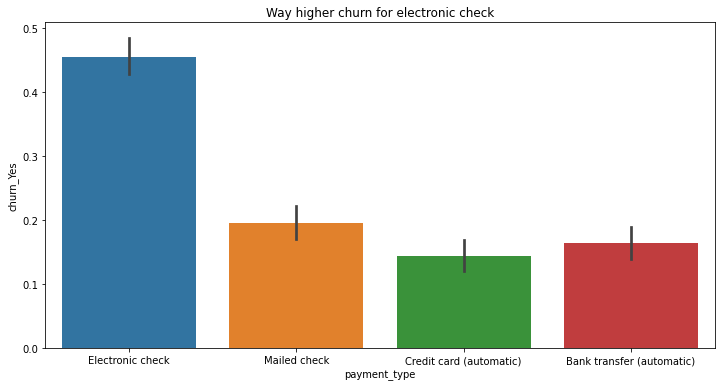

In [40]:
plt.figure(figsize=(12,6))
plt.title("Way higher churn for electronic check")
sns.barplot(y=telco_y_train, x= 'payment_type', data=telco_X_train)



# chi2 this one for sure

In [66]:
observed_payment_type = pd.crosstab(telco_X_train.payment_type, telco_y_train)
observed_payment_type

churn_Yes                    0    1
payment_type                       
Bank transfer (automatic)  720  141
Credit card (automatic)    728  122
Electronic check           727  607
Mailed check               722  176

    - ùêªùëú : paying by electronic check is unrelated to churn
    - ùêªùëé : paying by electronic check is related to churn

In [67]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed_payment_type.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[720 141]
 [728 122]
 [727 607]
 [722 176]]
---
Expected

[[2017  728]
 [ 879  317]]
---

chi^2 = 105.6857
p     = 0.0000
We reject the null hypothesis


In [41]:
# plt.figure(figsize=(15,6))
# plt.title("Churn increases as do monthly charges, up to a point")
# sns.barplot(y=telco_y_train, x= 'monthly_charges_bins', data=telco_X_train)
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


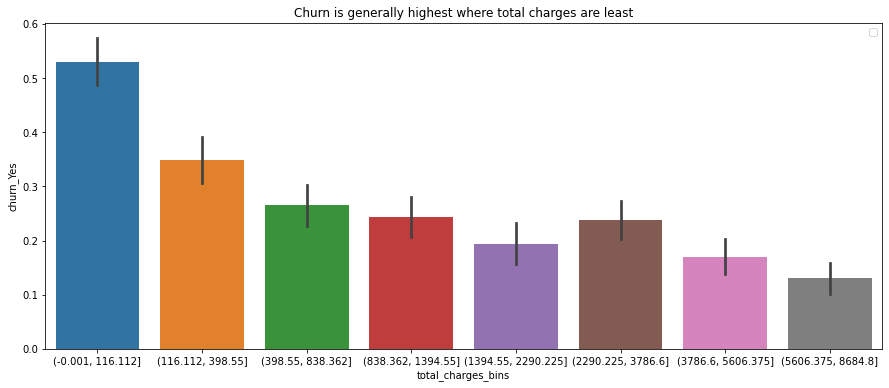

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [42]:
plt.figure(figsize=(15,6))
plt.title("Churn is generally highest where total charges are least")
sns.barplot(y=telco_y_train, x= 'total_charges_bins', data=telco_X_train)
plt.legend()
plt.show()
plt.tight_layout

In [46]:
confidence_level = 0.95
alpha = 1 - confidence_level
alpha

0.050000000000000044

In [47]:
# ùêªùëú : tenure and total charges are not linearly correlated
# ùêªùëé : tenure and total charges are linearly correlated

corr, p = stats.pearsonr(telco_X_train.tenure, telco_X_train.total_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.8273161852386846, 0.0)